# Early subduction evolution of the Easton Metamorphic Suite

**Jeremey Cordova$^{1}$, Sean R. Mulcahy$^{1}$, Elizabeth R. Schermer$^{1}$, Laura E. Webb$^{2}$**

*$^{1}$ Department of Geology, Western Washington University, Bellingham, WA, 98225, USA*  
*$^{2}$ Department of Geology, University of Vermont, Burlington, VT, 05401, USA*

This Jupyter notebook documents the data, data analysis and figure generation used for the manuscript:



The code in this notebook is written in Python 3 and uses standard scientific Python modules.  An executable version of this notebook as well as all of the data files is available in this Github repository: 

## Import python modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
plt.style.use('seaborn-ticks')

## Easton Metamorphic Suite mineral compositions

### Amphibole compositions

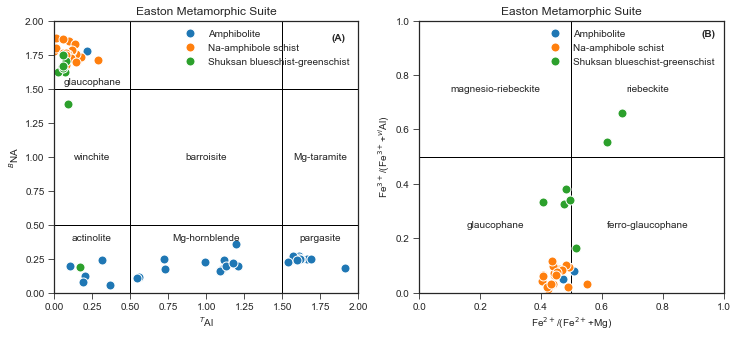

In [3]:
df = pd.read_csv('../data/easton-amphibole.csv')

plt.figure(figsize=(12,5))

plt.subplot(121)

amph1 = df.groupby('Unit')

for name, group in amph1:
    plt.plot(group.Al_T, group.Na_B, linestyle='', marker='o', markeredgecolor='white', ms=9, label=name)

plt.hlines(1.5, 0., 2., linewidth=1)
plt.hlines(0.5, 0., 2., linewidth=1)
plt.vlines(1.5, 0., 2., linewidth=1)
plt.vlines(0.5, 0., 2., linewidth=1)
plt.xlim(0, 2)
plt.ylim(0, 2)

plt.text(0.25, 1.55, 'glaucophane', horizontalalignment='center', verticalalignment='center')
plt.text(0.25, 1, 'winchite', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, 'barroisite', horizontalalignment='center', verticalalignment='center')
plt.text(1.75, 1, 'Mg-taramite', horizontalalignment='center', verticalalignment='center')
plt.text(0.25, .4, 'actinolite', horizontalalignment='center', verticalalignment='center')
plt.text(1, .4, 'Mg-hornblende', horizontalalignment='center', verticalalignment='center')
plt.text(1.75, .4, 'pargasite', horizontalalignment='center', verticalalignment='center')
plt.text(1.87, 1.87, '(A)', horizontalalignment='center', verticalalignment='center', fontweight='bold')


plt.xlabel('$^T$Al');
plt.ylabel('$^B$NA');
plt.title('Easton Metamorphic Suite')
plt.legend();

plt.subplot(122)

amph2 = df[df.Na_B>=1.5].groupby('Unit')

for name, group in amph2:
    plt.plot((group.Fe2_B + group.Fe2_C)/(group.Fe2_B + group.Fe2_C + group.Mg_C), 
             group.Fe3_C/(group.Fe3_C+group.Al_C), 
             linestyle='', marker='o', markeredgecolor='white', ms=9, label=name)
    
plt.hlines(0.5, 0., 1., linewidth=1)
plt.vlines(0.5, 0., 1., linewidth=1)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.text(0.25, 0.25, 'glaucophane', horizontalalignment='center', verticalalignment='center')
plt.text(0.75, 0.25, 'ferro-glaucophane', horizontalalignment='center', verticalalignment='center')
plt.text(0.25, 0.75, 'magnesio-riebeckite', horizontalalignment='center', verticalalignment='center')
plt.text(0.75, 0.75, 'riebeckite', horizontalalignment='center', verticalalignment='center')
plt.text(.95, .95, '(B)', horizontalalignment='center', verticalalignment='center', fontweight='bold')


plt.xlabel('Fe$^{2+}$/(Fe$^{2+}$+Mg)');
plt.ylabel('Fe$^{3+}$/(Fe$^{3+}$+$^{vi}$Al)');
plt.title('Easton Metamorphic Suite')
plt.legend();

plt.savefig('../figs/easton-amphibole.png')

### White mica compositions

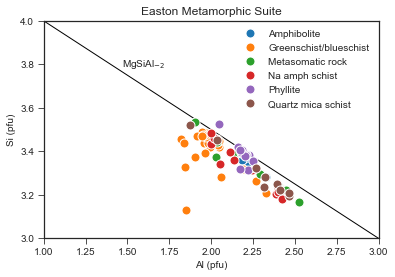

In [4]:
wm = pd.read_csv('../data/easaton-mica.csv')

ms = wm.groupby('Unit')

plt.plot([1., 3.], [4., 3.], color='k', linestyle='-', linewidth=1) #MgSiAl-2
plt.text(1.6, 3.8, 'MgSiAl$_{-2}$', horizontalalignment='center', verticalalignment='center')

for name, group in ms:
    plt.plot(group.Al, group.Si, linestyle='', marker='o', ms=9, markeredgecolor='white', label=name)

plt.xlim(1, 3)
plt.ylim(3, 4)
plt.xlabel('Al (pfu)');
plt.ylabel('Si (pfu)');
plt.title('Easton Metamorphic Suite');
plt.legend();

plt.savefig('../figs/easton-mica.png')

## Easton Metamorphic Suite T-D-t evolution

### Import and display temperature-fabric-time data

Import Table 1 of the manuscript file that contains the age and temperature data for dated fabrics within units of the Easton Metamorphic Suite.

In [22]:
tb1 = pd.read_csv('../data/easton-temp-time.csv')
grp1 = tb1.groupby('Unit')
tb1

,Sample,Rock type,Mineral,TempMet,sTM,PlotTemp,sTP,Age,SigmaAge,Unit,Fabric,Rank1,Rank2
0,FC-80B,amph,Hb,760,55.0,500.0,55.0,167.4,1.9,Amphibolite,S$_{1}^{A}$,1,1
1,FC-83,amph,Hb,590,70.0,500.0,55.0,164.8,1.5,Amphibolite,S$_{2}^{A}$,2,1
2,FC-82,qms,Wm,530,55.0,400.0,55.0,165.3,1.4,Na-amphibole schist,S$_{1}^{N}$,4,3
3,FC-68,RG amph,Wm,<400,50.0,360.0,50.0,162.5,0.9,Amphibolite,S$_{3}^{A}$,3,1
4,FC-90,nas,Wm,360,135.0,360.0,135.0,157.0,1.9,Na-amphibole schist,S$_{2}^{N}$,5,3
5,FC-90,nas,Wm,NaN,NaN,NaN,NaN,167.0,1.7,Na-amphibole schist,S$_{?}^{N}$,5,3
6,FC-84,metasom,Wm,350,90.0,350.0,90.0,160.1,1.3,Metasomatic schist,S$_{2}^{A}$,2,2
7,FC-91,gs,Wm,360,55.0,360.0,55.0,139.5,0.8,Shuksan greenschist/blueschist,S$_{1}^{G}$,7,5
8,FC-9,bs,Wm,280,50.0,280.0,50.0,136.7,0.8,Shuksan greenschist/blueschist,S$_{2}^{G}$,8,5
9,FC-36,bs,Wm,<400,50.0,350.0,50.0,139.0,2.4,Shuksan greenschist/blueschist,S$_{2}^{G}$,8,5


### Plot T-t and D-t diagrams

Plot temperature-time (T-t) and fabric-time (D-t) diagrams

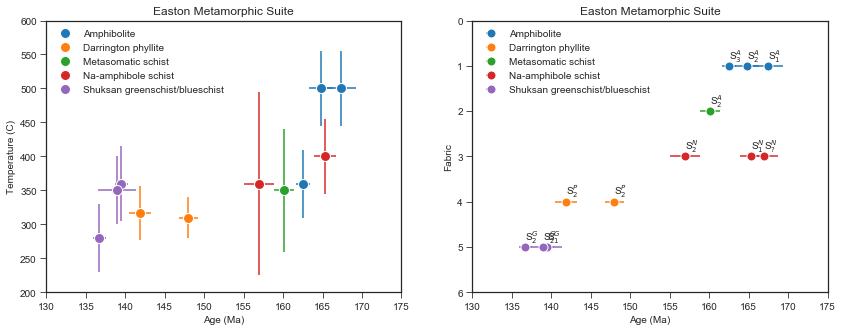

In [26]:
plt.figure(figsize=(14,5))

plt.subplot(121)
for name,group in grp1:
    plt.errorbar(group.Age, group.PlotTemp, xerr=group.SigmaAge, yerr=group.sTP, 
                 linestyle='none', marker='o', markeredgecolor='white', label=name, ms=10)
    
#plt.gca().invert_xaxis()
plt.xlabel('Age (Ma)')
plt.ylabel('Temperature (C)')
plt.title('Easton Metamorphic Suite')
plt.legend()
plt.xlim(130, 175)
plt.ylim(200, 600)


plt.subplot(122)
for name,group in grp1:
    plt.errorbar(group.Age, group.Rank2, xerr=group.SigmaAge, 
                 linestyle='none', marker='o', markeredgecolor='white', label=name, ms=9)

plt.xlabel('Age (Ma)')
plt.ylabel('Fabric')
plt.title('Easton Metamorphic Suite')
plt.legend()
plt.xlim(130, 175)
plt.ylim(6,0)


for label, x, y in zip(tb1.Fabric, tb1.Age, tb1.Rank2):
    plt.annotate(label,xy=(x, y),xytext=(0, 7), textcoords='offset points')


plt.savefig('../figs/easton-TDt.png')

Explore different options for presenting the D-t data

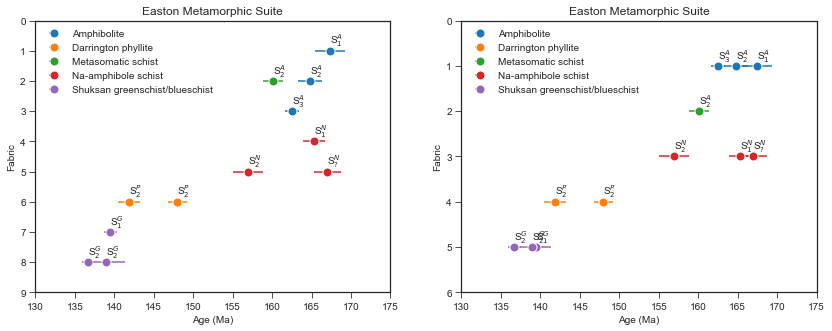

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(121)
for name,group in grp1:
    plt.errorbar(group.Age, group.Rank1, xerr=group.SigmaAge, 
                 linestyle='none', marker='o', markeredgecolor='white', label=name, ms=9)

plt.xlabel('Age (Ma)')
plt.ylabel('Fabric')
plt.title('Easton Metamorphic Suite')
plt.legend()
plt.xlim(130, 175)
plt.ylim(9,0)
#plt.gca().invert_yaxis()
#plt.ylim(200, 600)
#plt.savefig('../figs

for label, x, y in zip(tb1.Fabric, tb1.Age, tb1.Rank1):
    plt.annotate(label,xy=(x, y),xytext=(0, 7), textcoords='offset points')

plt.subplot(122)
for name,group in grp1:
    plt.errorbar(group.Age, group.Rank2, xerr=group.SigmaAge, 
                 linestyle='none', marker='o', markeredgecolor='white', label=name, ms=9)

plt.xlabel('Age (Ma)')
plt.ylabel('Fabric')
plt.title('Easton Metamorphic Suite')
plt.legend()
plt.xlim(130, 175)
plt.ylim(6,0)


for label, x, y in zip(tb1.Fabric, tb1.Age, tb1.Rank2):
    plt.annotate(label,xy=(x, y),xytext=(0, 7), textcoords='offset points')
    
plt.savefig('../figs/easton-Dt.png')